In [73]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [74]:
# extracting overview data
urls=["https://www.iplt20.com/auction/2013",
 "https://www.iplt20.com/auction/2014",
 "https://www.iplt20.com/auction/2015",
 "https://www.iplt20.com/auction/2016",
 "https://www.iplt20.com/auction/2017",
 "https://www.iplt20.com/auction/2018",
 "https://www.iplt20.com/auction/2019",
 "https://www.iplt20.com/auction/2020",
 "https://www.iplt20.com/auction/2021",
 "https://www.iplt20.com/auction/2022",
 "https://www.iplt20.com/auction/2023",
 "https://www.iplt20.com/auction/2024"]
data1=[]
for url in urls:
    response=requests.get(url)
    html=BeautifulSoup(response.text,"html.parser")
    if url[-4:]=="2019":
        tables=html.find_all("table",{"class":"ih-td-tab w-100"})
    else:
        tables=html.find_all("table",{"class":"ih-td-tab w-100 auction-tbl"})
    
    table=tables[0]
    
    rows=table.find_all("tr")
    
    column=rows[0].text.strip().split("\n")[1:]
    data=[]
    if url[-4:] in ("2021","2022"):
        for row in rows[1:]:
            data.append(row.text.strip().split("\n")[1:])
        data = [[item for item in sublist if item != ''] for sublist in data] 
    else:
        for row in rows[1:]:
            data.append(row.text.strip().split("\n"))
        data = [[item for item in sublist if item != ''] for sublist in data] 

    overview=pd.DataFrame(data,columns=column)
    overview["year"]=url[-4:]
    data1.append(overview)
    
overview=pd.concat(data1,ignore_index=True)
overview

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS,year
0,Chennai Super Kings,"$1,846,087",11,22,2013
1,Delhi Daredevils,"$655,978",11,26,2013
2,Kings XI Punjab,"$6,072,826",8,23,2013
3,Kolkata Knight Riders,"$1,508,696",11,23,2013
4,Mumbai Indians,"$341,739",11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,"₹1,05,00,000",8,25,2024
99,Punjab Kings,"₹4,15,00,000",8,25,2024
100,Rajasthan Royals,"₹20,00,000",8,22,2024
101,Royal Challengers Bengaluru,"₹2,85,00,000",8,25,2024


### cleaning overview data

In [75]:

def cur_into_rupees(series):
    funds = series['FUNDS REMAINING']
    if "$" in funds:
        usd = float(funds.lstrip('$').replace(',',''))
        inr = str(round((usd*53.158)/100000) * 100000) #multiplying with 53.15 as aucton held on February 3, 2013 and price of inr to usd was 53.15
        return inr
    else:
        return funds

In [76]:
overview.loc[overview["year"]=="2013","FUNDS REMAINING"]=overview[overview["year"]=="2013"].apply(cur_into_rupees,axis=1)
#overview

In [77]:
overview["FUNDS REMAINING"]=overview["FUNDS REMAINING"].str.replace(",","").str.replace("₹","")
overview

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Daredevils,34900000,11,26,2013
2,Kings XI Punjab,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bengaluru,28500000,8,25,2024


In [78]:
# changing the names of teams 
overview.loc[overview['TEAM'].str.contains('Delhi'), 'TEAM'] = 'Delhi Capitals'
overview.loc[overview['TEAM'].str.contains('Punjab'), 'TEAM'] = 'Punjab Kings'
overview.loc[overview['TEAM'].str.contains('Bengaluru'), 'TEAM'] = 'Royal Challengers Bangalore'
overview.loc[overview['TEAM'].str.contains('Gujarat'), 'TEAM'] = 'Gujarat Titans'
overview.loc[overview['TEAM'].str.contains("Pune"), 'TEAM'] = 'Rising Pune Supergiant'
overview.TEAM.unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings',
       'Kolkata Knight Riders', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [79]:
#changing the names of column
overview.columns = overview.columns.str.lower().str.replace(' ','_')
overview

,team,funds_remaining,overseas_players_,total_players,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Capitals,34900000,11,26,2013
2,Punjab Kings,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bangalore,28500000,8,25,2024


In [80]:
overview.rename(columns={"overseas_players_":"overseas_players"},inplace=True)

In [81]:
overview

,team,funds_remaining,overseas_players,total_players,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Capitals,34900000,11,26,2013
2,Punjab Kings,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bangalore,28500000,8,25,2024


In [82]:
overview["funds_remaining"]=overview["funds_remaining"].astype(int)

In [83]:
overview["overseas_players"]=overview["overseas_players"].astype(int)

In [84]:
overview["total_players"]=overview["total_players"].astype(int)

In [85]:
overview["year"]=overview["year"].astype(int)

In [86]:
overview.dtypes

team                object
funds_remaining      int64
overseas_players     int64
total_players        int64
year                 int64
dtype: object

In [87]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team              103 non-null    object
 1   funds_remaining   103 non-null    int64 
 2   overseas_players  103 non-null    int64 
 3   total_players     103 non-null    int64 
 4   year              103 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.2+ KB


In [89]:
overview["team"]=overview["team"].str.strip()

In [90]:
overview

,team,funds_remaining,overseas_players,total_players,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Capitals,34900000,11,26,2013
2,Punjab Kings,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bangalore,28500000,8,25,2024


### extracting top_buys data


In [91]:
# Extracting top_buys table from all the years
urls = ["https://www.iplt20.com/auction/2024",
        "https://www.iplt20.com/auction/2023",
        "https://www.iplt20.com/auction/2022",
        "https://www.iplt20.com/auction/2021",
        "https://www.iplt20.com/auction/2020",
        "https://www.iplt20.com/auction/2019",
        "https://www.iplt20.com/auction/2018",
        "https://www.iplt20.com/auction/2017",
        "https://www.iplt20.com/auction/2016",
        "https://www.iplt20.com/auction/2015",
        "https://www.iplt20.com/auction/2014",
        "https://www.iplt20.com/auction/2013"]
#collecting all dataframes
all_data = [] 
for url in urls:
    response = requests.get(url)
    html = BeautifulSoup(response.text,'html.parser')
    tables= html.find_all('table', {'class': 'ih-td-tab w-100 auction-tbl'})

    # extracting overview 1st table
    if url [-4:] == '2019':
        top_buys_table = tables[0]
        
    elif url[-4:] == '2023':
        top_buys_table = tables[11]
    
    else:
        top_buys_table = tables[1]
 
    rows = top_buys_table.find_all('tr')
    top_buys_column = rows[0].text.strip('\n').split('\n')[1:]
    if url[-4:] == '2022':
        top_buys_column = rows[0].text.strip('\n').split('\n')
    
    data = []
    for x in range(1, len(rows)):
        row_data = [item for item in rows[x].text.strip().split('\n') if item.strip()]

        # Remove first column only for 2021 as it contains serial number while other year doesn't
        if url[-4:] == '2021':
            row_data = row_data[1:]
            
        data.append(row_data)

    # creating dataframe
    datafra = pd.DataFrame(data, columns = top_buys_column)
    
    # adding year column
    datafra['YEAR'] = url[-4:]

    all_data.append(datafra)

top_buys=pd.concat(all_data, ignore_index=True)
top_buys

,TEAM,PLAYER,TYPE,PRICE,YEAR
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"₹24,75,00,000",2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"₹20,50,00,000",2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"₹14,00,00,000",2024
3,Punjab Kings,Harshal Patel,All-Rounder,"₹11,75,00,000",2024
4,Royal Challengers Bengaluru,Alzarri Joseph,Bowler,"₹11,50,00,000",2024
...,...,...,...,...,...
98,Pune Warriors India,Abhishek Nayar,All-Rounder,"$675,000",2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,"$675,000",2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,"$625,000",2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,"$625,000",2013


### cleaning top_buys data


In [92]:
def cur_into_rupees(series):
    funds = series['PRICE']
    if "$" in funds:
        usd = float(funds.lstrip('$').replace(',',''))
        inr = str(round((usd*53.158)/100000) * 100000) #multiplying with 53.15 as aucton held on February 3, 2013 and price of inr to usd was 53.15
        return inr
    else:
        return funds
        

In [93]:
top_buys

,TEAM,PLAYER,TYPE,PRICE,YEAR
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"₹24,75,00,000",2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"₹20,50,00,000",2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"₹14,00,00,000",2024
3,Punjab Kings,Harshal Patel,All-Rounder,"₹11,75,00,000",2024
4,Royal Challengers Bengaluru,Alzarri Joseph,Bowler,"₹11,50,00,000",2024
...,...,...,...,...,...
98,Pune Warriors India,Abhishek Nayar,All-Rounder,"$675,000",2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,"$675,000",2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,"$625,000",2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,"$625,000",2013


In [94]:
top_buys.loc[top_buys["YEAR"]=="2013","PRICE"]=top_buys[top_buys["YEAR"]=="2013"].apply(cur_into_rupees,axis=1)
top_buys

,TEAM,PLAYER,TYPE,PRICE,YEAR
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"₹24,75,00,000",2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"₹20,50,00,000",2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"₹14,00,00,000",2024
3,Punjab Kings,Harshal Patel,All-Rounder,"₹11,75,00,000",2024
4,Royal Challengers Bengaluru,Alzarri Joseph,Bowler,"₹11,50,00,000",2024
...,...,...,...,...,...
98,Pune Warriors India,Abhishek Nayar,All-Rounder,35900000,2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,35900000,2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,33200000,2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,33200000,2013


In [95]:
top_buys["PRICE"]=top_buys["PRICE"].str.replace(",","").str.replace("₹","")
#top_buys

In [96]:
# changing column name into standard
top_buys.columns =top_buys.columns.str.strip().str.lower().str.replace("team","team_name").str.replace("player","player_name")

In [97]:
top_buys["type"].unique()


array(['Bowler', 'All-Rounder', 'Batter', 'Wicket-Keeper',
       'Wicket Keeper', 'Batsman', 'All-Rounder '], dtype=object)

In [98]:
top_buys["type"]=top_buys["type"].str.replace("Wicket-Keeper","Wicket Keeper")

In [99]:
top_buys["type"]=top_buys["type"].str.replace("All-Rounder ","All-Rounder")

In [100]:
top_buys["type"]=top_buys["type"].str.replace("Batte","Batsman")

In [101]:
top_buys["type"]=top_buys["type"].str.replace("Batsmanr","Batsman")

In [102]:
top_buys["team_name"].unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Punjab Kings',
       'Royal Challengers Bengaluru', 'Gujarat Titans',
       'Rajasthan Royals', 'Mumbai Indians', 'Lucknow Super Giants',
       'Delhi Capitals', 'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant',
       'Pune Warriors India'], dtype=object)

In [103]:
top_buys.loc[top_buys['team_name'].str.contains('Delhi'), 'team_name'] = 'Delhi Capitals'
top_buys.loc[top_buys['team_name'].str.contains('Punjab'), 'team_name'] = 'Punjab Kings'
top_buys.loc[top_buys['team_name'].str.contains('Bengaluru'), 'team_name'] = 'Royal Challengers Bangalore'
top_buys.loc[top_buys['team_name'].str.contains('Gujarat'), 'team_name'] = 'Gujarat Titans'
top_buys.loc[top_buys['team_name'].str.contains("Pune"), 'team_name'] = 'Rising Pune Supergiant'

In [104]:
top_buys["team_name"].unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Punjab Kings',
       'Royal Challengers Bangalore', 'Gujarat Titans',
       'Rajasthan Royals', 'Mumbai Indians', 'Lucknow Super Giants',
       'Delhi Capitals', 'Rising Pune Supergiant'], dtype=object)

In [105]:
top_buys.dtypes

team_name      object
player_name    object
type           object
price          object
year           object
dtype: object

In [106]:
top_buys["price"]=top_buys["price"].astype(int)

In [107]:
top_buys["year"]=top_buys["year"].astype(int)

In [108]:
top_buys.dtypes

team_name      object
player_name    object
type           object
price           int64
year            int64
dtype: object

In [109]:
top_buys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team_name    103 non-null    object
 1   player_name  103 non-null    object
 2   type         103 non-null    object
 3   price        103 non-null    int64 
 4   year         103 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.2+ KB


In [110]:
top_buys

,team_name,player_name,type,price,year
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000,2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000,2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000,2024
3,Punjab Kings,Harshal Patel,All-Rounder,117500000,2024
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,115000000,2024
...,...,...,...,...,...
98,Rising Pune Supergiant,Abhishek Nayar,All-Rounder,35900000,2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,35900000,2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,33200000,2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,33200000,2013


In [111]:
top_buys.rename(columns={"team_name":"team"},inplace=True)

In [112]:
top_buys["team"]=top_buys["team"].str.strip()
top_buys["player_name"]=top_buys["player_name"].str.strip()
top_buys["type"]=top_buys["type"].str.strip()

### extracting sold_players data

In [113]:
all_data = []

for url in urls:
    response = requests.get(url)
    html = BeautifulSoup(response.text,'html.parser')
    if url[-4:] == '2024':
        tables=html.find_all('table',{'class':'ih-td-tab w-100 auction-tbl t1'})
    elif url[-4:] in ['2023','2022','2021']:
        tables=html.find_all('table',{'class':'ih-td-tab w-100 auction-tbl'})
    else:
        tables=html.find_all('table',{'class':'ih-td-tab w-100 auction-tbl sold-players'})
    
    if url[-4:] == '2024':
        teams = []
        result = [h2 for h2 in html.find_all('h2') if h2.find('img')]
        for h2 in result:
            teams.append(h2.text)
        data = []
        
        for x in range(len(tables)):
            sold_table = tables[x]
            rows = sold_table.find_all('tr')
            header = rows[0].text.strip('\n').split('\n')[1:]
            
            for y in range(1, len(rows)):
                row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
                row_data.append(teams[x])  # Match team with table (offset by 2)
                row_data.append(url[-4:])
                data.append(row_data[1:])
                
        header.append('TEAM')
        header.append('YEAR')
        df1 = pd.DataFrame(data,columns = header)
        df1.drop(columns='NATIONALITY', inplace = True)
        all_data.append(df1)
    
    elif url[-4:] == '2023':
        teams = []
        result = [h2 for h2 in html.find_all('h2') if h2.find('img')]
        for h2 in result:
            teams.append(h2.text)        
        data = []
        
        for x in range(1,len(tables)-2):
            sold_table = tables[x]
            rows = sold_table.find_all('tr')
            header = rows[0].text.strip('\n').split('\n')[1:]
            
            for y in range(1, len(rows)):
                row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
                row_data.append(teams[x - 1])  # Match team with table (offset by 2)
                row_data.append(url[-4:])
                data.append(row_data[1:])
                
        header.append('TEAM')
        header.append('YEAR')
        df1 = pd.DataFrame(data,columns = header)
        df1.drop(columns='NATIONALITY', inplace = True)
        all_data.append(df1)

    
    elif url[-4:] == '2022':
        teams = []
        result = [h2 for h2 in html.find_all('h2') if h2.find('img')]
        for h2 in result:
            teams.append(h2.text)
        data = []
        
        for x in range(3,len(tables)-1):
            sold_table = tables[x]
            rows = sold_table.find_all('tr')
            header = rows[0].text.strip('\n').split('\n')[1:]
            
            for y in range(1, len(rows)):
                row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
                row_data.append(teams[x - 3])  # Match team with table (offset by 2)
                row_data.append(url[-4:])
                data.append(row_data[1:])
                
        header.append('TEAM')
        header.append('YEAR')
        df1 = pd.DataFrame(data,columns = header)
        df1.drop(columns='NATIONALITY', inplace = True)
        all_data.append(df1)
    
    elif url[-4:] == '2021':
        teams = []
        result = [h2 for h2 in html.find_all('h2') if h2.find('img')]
        for h2 in result:
            teams.append(h2.text)
        data = []
    
        for x in range(2,len(tables)-1):
            sold_table = tables[x]
            rows = sold_table.find_all('tr')
            header = rows[0].text.strip('\n').split('\n')[1:]
                
            for y in range(1, len(rows)):
                row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
                row_data.append(teams[x - 2])  
                row_data.append(url[-4:])
                data.append(row_data[1:])
        header.append('TEAM')
        header.append('YEAR')
        df2 = pd.DataFrame(data,columns = header)
        all_data.append(df2)

    else:
        teams = []
        result = [h2 for h2 in html.find_all('h2') if h2.find('img')]
        for h2 in result:
            teams.append(h2.text)
        data = []
        if url[-4:] == '2020':
            for x in range(len(tables)-1):
                sold_table = tables[x]
                rows = sold_table.find_all('tr')
                header = rows[0].text.strip('\n').split('\n')[1:]
               
                for y in range(1, len(rows)):
                    row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
                    row_data.append(teams[x])  # Match team with table (offset by 2)
                    row_data.append(url[-4:])
                    data.append(row_data)
                    
            header.append('TEAM')
            header.append('YEAR')
            df2 = pd.DataFrame(data,columns = header)
            all_data.append(df2)

        else:
            for x in range(len(tables)):
                
                sold_table = tables[x]
                rows = sold_table.find_all('tr')
                header = rows[0].text.strip('\n').split('\n')[1:]
               
                for y in range(1, len(rows)):
                    row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
                    row_data.append(teams[x])  # Match team with table (offset by 2)
                    row_data.append(url[-4:])
                    data.append(row_data)
                    
            header.append('TEAM')
            header.append('YEAR')
            df2 = pd.DataFrame(data,columns = header)
            all_data.append(df2)


tables=html.find_all('table',{'class':'ih-td-tab w-100 auction-tbl'})
last_sold = tables[2]
rows = last_sold.find_all('tr')
header = rows[0].text.strip('\n').split('\n')[1:]
data = []
for y in range(1, len(rows)):
    row_data = [item for item in rows[y].text.strip().split('\n') if item.strip()]
    row_data.append('Sunrisers Hyderabad')
    row_data.append(url[-4:])
    data.append(row_data)
header.append('TEAM')
header.append('YEAR')
df3 = pd.DataFrame(data,columns = header)
all_data.append(df3)

# https://www.iplt20.com/auction/2022 2022 year has one extra column of nationality so we will fetch it manually then drop that extra column
# and add that to other data


sold_players = pd.concat(all_data,ignore_index = True)
sold_players

,PLAYER,TYPE,PRICE PAID,TEAM,YEAR
0,Avanish Rao Aravelly,Wicket-Keeper,"20,00,000",Chennai Super Kings,2024
1,Mustafizur Rahman,Bowler,"2,00,00,000",Chennai Super Kings,2024
2,Daryl Mitchell,All-Rounder,"14,00,00,000",Chennai Super Kings,2024
3,Sameer Rizvi,Batter,"8,40,00,000",Chennai Super Kings,2024
4,Rachin Ravindra,All-Rounder,"1,80,00,000",Chennai Super Kings,2024
...,...,...,...,...,...
1117,Darren Sammy,All-Rounder,"425,000",Sunrisers Hyderabad,2013
1118,Sudeep Tyagi,Bowler,"100,000",Sunrisers Hyderabad,2013
1119,Clinton McKay,Bowler,"100,000",Sunrisers Hyderabad,2013
1120,Nathan McCullum,Bowler,"100,000",Sunrisers Hyderabad,2013


### cleaning sold_players data

In [114]:
sold_players.columns=sold_players.columns.str.lower().str.replace(" ","_")

In [115]:
sold_players["type"].unique()

array(['Wicket-Keeper ', 'Bowler ', 'All-Rounder ', 'Batter ', 'Batsman ',
       'Wicket Keeper ', 'All-Rounder', 'Batsman', 'Bowler',
       ' All-Rounder ', ' Bowler ', ' Wicket Keeper', 'Wicket Keeper'],
      dtype=object)

In [116]:
sold_players["type"]=sold_players["type"].str.strip()

In [117]:
sold_players["type"].unique()

array(['Wicket-Keeper', 'Bowler', 'All-Rounder', 'Batter', 'Batsman',
       'Wicket Keeper'], dtype=object)

In [118]:
sold_players["type"]=sold_players["type"].str.replace("Wicket-Keeper","Wicket Keeper")

In [119]:
sold_players["type"].unique()

array(['Wicket Keeper', 'Bowler', 'All-Rounder', 'Batter', 'Batsman'],
      dtype=object)

In [120]:
sold_players["team"].unique()

array([' Chennai Super Kings', ' Delhi Capitals', ' Gujarat Titans',
       ' Kolkata Knight Riders', ' Lucknow Super Giants',
       ' Mumbai Indians', ' Punjab Kings', ' Rajasthan Royals',
       ' Royal Challengers Bengaluru', ' Sunrisers Hyderabad',
       ' Royal Challengers Bangalore', ' Kings XI Punjab',
       'Kings XI Punjab', 'Delhi Daredevils', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Chennai Super Kings',
       'Rajasthan Royals', 'Pune Warriors India', 'Sunrisers Hyderabad'],
      dtype=object)

In [121]:
sold_players["team"]=sold_players["team"].str.strip()

In [122]:
sold_players.loc[sold_players['team'].str.contains('Delhi'), 'team'] = 'Delhi Capitals'
sold_players.loc[sold_players['team'].str.contains('Punjab'), 'team'] = 'Punjab Kings'
sold_players.loc[sold_players['team'].str.contains('Bengaluru'), 'team'] = 'Royal Challengers Bangalore'
sold_players.loc[sold_players['team'].str.contains('Gujarat'), 'team'] = 'Gujarat Titans'
sold_players.loc[sold_players['team'].str.contains("Pune"), 'team'] = 'Rising Pune Supergiant'

In [123]:
sold_players["team"].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rising Pune Supergiant'], dtype=object)

In [124]:
def cur_into_rupees(series):
    funds = series['PRICE PAID']
    if "$" in funds:
        usd = float(funds.lstrip('$').replace(',',''))
        inr = str(round((usd*53.158)/100000) * 100000) #multiplying with 53.15 as aucton held on February 3, 2013 and price of inr to usd was 53.15
        return inr
    else:
        return funds

In [125]:
#sold_players.loc[sold_players['year']=='2013','price_paid'] = sold_players[sold_players['year']=='2013'].apply(cur_into_rupees,axis=1)

In [126]:
sold_players['price_paid'] = sold_players['price_paid'].str.strip('₹').str.replace(',','')

In [127]:
sold_players

,player,type,price_paid,team,year
0,Avanish Rao Aravelly,Wicket Keeper,2000000,Chennai Super Kings,2024
1,Mustafizur Rahman,Bowler,20000000,Chennai Super Kings,2024
2,Daryl Mitchell,All-Rounder,140000000,Chennai Super Kings,2024
3,Sameer Rizvi,Batter,84000000,Chennai Super Kings,2024
4,Rachin Ravindra,All-Rounder,18000000,Chennai Super Kings,2024
...,...,...,...,...,...
1117,Darren Sammy,All-Rounder,425000,Sunrisers Hyderabad,2013
1118,Sudeep Tyagi,Bowler,100000,Sunrisers Hyderabad,2013
1119,Clinton McKay,Bowler,100000,Sunrisers Hyderabad,2013
1120,Nathan McCullum,Bowler,100000,Sunrisers Hyderabad,2013


In [128]:
sold_players.dtypes

player        object
type          object
price_paid    object
team          object
year          object
dtype: object

In [129]:
sold_players["price_paid"] =sold_players["price_paid"].astype(int)
sold_players["year"] =sold_players["year"].astype(int)

In [130]:
sold_players["player"]=sold_players["player"].str.strip()

In [131]:
sold_players

,player,type,price_paid,team,year
0,Avanish Rao Aravelly,Wicket Keeper,2000000,Chennai Super Kings,2024
1,Mustafizur Rahman,Bowler,20000000,Chennai Super Kings,2024
2,Daryl Mitchell,All-Rounder,140000000,Chennai Super Kings,2024
3,Sameer Rizvi,Batter,84000000,Chennai Super Kings,2024
4,Rachin Ravindra,All-Rounder,18000000,Chennai Super Kings,2024
...,...,...,...,...,...
1117,Darren Sammy,All-Rounder,425000,Sunrisers Hyderabad,2013
1118,Sudeep Tyagi,Bowler,100000,Sunrisers Hyderabad,2013
1119,Clinton McKay,Bowler,100000,Sunrisers Hyderabad,2013
1120,Nathan McCullum,Bowler,100000,Sunrisers Hyderabad,2013


In [132]:
#create a new data to do data modelling

In [133]:


df_logo = pd.DataFrame({"team":sold_players["team"].unique()})  # 2026 is exclusive
print(df_logo)


                           team
0           Chennai Super Kings
1                Delhi Capitals
2                Gujarat Titans
3         Kolkata Knight Riders
4          Lucknow Super Giants
5                Mumbai Indians
6                  Punjab Kings
7              Rajasthan Royals
8   Royal Challengers Bangalore
9           Sunrisers Hyderabad
10       Rising Pune Supergiant


In [134]:
logo_urls=["https://documents.iplt20.com/ipl/CSK/logos/Logooutline/CSKoutline.png",
           "https://documents.iplt20.com/ipl/DC/Logos/LogoOutline/DCoutline.png",
           "https://documents.iplt20.com/ipl/GT/Logos/Roundbig/GTroundbig.png",
           "https://documents.iplt20.com/ipl/KKR/Logos/Logooutline/KKRoutline.png",
           "https://documents.iplt20.com/ipl/LSG/Logos/Logooutline/LSGoutline.png",
           "https://documents.iplt20.com/ipl/MI/Logos/Roundbig/MIroundbig.png",
           "https://documents.iplt20.com/ipl/PBKS/Logos/Roundbig/PBKSroundbig.png",
           "https://documents.iplt20.com/ipl/RR/Logos/RR_Logo.png",
           "https://documents.iplt20.com/ipl/RCB/Logos/Roundbig/RCBroundbig.png",
           "https://documents.iplt20.com/ipl/SRH/Logos/Logooutline/SRHoutline.png",
           "https://img1.hscicdn.com/image/upload/f_auto/lsci/db/PICTURES/CMS/313500/313524.logo.png"
          ]

In [135]:
df_logo["logo_url"] = logo_urls

In [136]:
df_logo


,team,logo_url
0,Chennai Super Kings,https://documents.iplt20.com/ipl/CSK/logos/Log...
1,Delhi Capitals,https://documents.iplt20.com/ipl/DC/Logos/Logo...
2,Gujarat Titans,https://documents.iplt20.com/ipl/GT/Logos/Roun...
3,Kolkata Knight Riders,https://documents.iplt20.com/ipl/KKR/Logos/Log...
4,Lucknow Super Giants,https://documents.iplt20.com/ipl/LSG/Logos/Log...
5,Mumbai Indians,https://documents.iplt20.com/ipl/MI/Logos/Roun...
6,Punjab Kings,https://documents.iplt20.com/ipl/PBKS/Logos/Ro...
7,Rajasthan Royals,https://documents.iplt20.com/ipl/RR/Logos/RR_L...
8,Royal Challengers Bangalore,https://documents.iplt20.com/ipl/RCB/Logos/Rou...
9,Sunrisers Hyderabad,https://documents.iplt20.com/ipl/SRH/Logos/Log...


In [137]:
df_year=pd.DataFrame({"year":sold_players["year"].unique()})

In [138]:
df_year

,year
0,2024
1,2023
2,2022
3,2021
4,2020
5,2019
6,2018
7,2017
8,2016
9,2015


In [139]:
#now trasnfering it to excel sheets

In [140]:
overview.to_excel("C:\\Users\\shrut\\OneDrive\\Desktop\\ipl_cleaned data\\overview.xlsx",index=False)
df_year.to_excel("C:\\Users\\shrut\\OneDrive\\Desktop\\ipl_cleaned data\\df_year.xlsx",index=False)
df_logo.to_excel("C:\\Users\\shrut\\OneDrive\\Desktop\\ipl_cleaned data\\df_logo.xlsx",index=False)
sold_players.to_excel("C:\\Users\\shrut\\OneDrive\\Desktop\\ipl_cleaned data\\sold_players.xlsx",index=False)
top_buys.to_excel("C:\\Users\\shrut\\OneDrive\\Desktop\\ipl_cleaned data\\top_buys.xlsx",index=False)

### data visualization

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
overview

,team,funds_remaining,overseas_players,total_players,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Capitals,34900000,11,26,2013
2,Punjab Kings,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bangalore,28500000,8,25,2024


In [142]:
df_year

,year
0,2024
1,2023
2,2022
3,2021
4,2020
5,2019
6,2018
7,2017
8,2016
9,2015


In [143]:
df_logo

,team,logo_url
0,Chennai Super Kings,https://documents.iplt20.com/ipl/CSK/logos/Log...
1,Delhi Capitals,https://documents.iplt20.com/ipl/DC/Logos/Logo...
2,Gujarat Titans,https://documents.iplt20.com/ipl/GT/Logos/Roun...
3,Kolkata Knight Riders,https://documents.iplt20.com/ipl/KKR/Logos/Log...
4,Lucknow Super Giants,https://documents.iplt20.com/ipl/LSG/Logos/Log...
5,Mumbai Indians,https://documents.iplt20.com/ipl/MI/Logos/Roun...
6,Punjab Kings,https://documents.iplt20.com/ipl/PBKS/Logos/Ro...
7,Rajasthan Royals,https://documents.iplt20.com/ipl/RR/Logos/RR_L...
8,Royal Challengers Bangalore,https://documents.iplt20.com/ipl/RCB/Logos/Rou...
9,Sunrisers Hyderabad,https://documents.iplt20.com/ipl/SRH/Logos/Log...


In [144]:
top_buys

,team,player_name,type,price,year
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000,2024
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000,2024
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000,2024
3,Punjab Kings,Harshal Patel,All-Rounder,117500000,2024
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,115000000,2024
...,...,...,...,...,...
98,Rising Pune Supergiant,Abhishek Nayar,All-Rounder,35900000,2013
99,Sunrisers Hyderabad,Thisara Perera,All-Rounder,35900000,2013
100,Kolkata Knight Riders,Sachithra Senanayaka,All-Rounder,33200000,2013
101,Chennai Super Kings,Christopher Morris,All-Rounder,33200000,2013


In [145]:
sold_players

,player,type,price_paid,team,year
0,Avanish Rao Aravelly,Wicket Keeper,2000000,Chennai Super Kings,2024
1,Mustafizur Rahman,Bowler,20000000,Chennai Super Kings,2024
2,Daryl Mitchell,All-Rounder,140000000,Chennai Super Kings,2024
3,Sameer Rizvi,Batter,84000000,Chennai Super Kings,2024
4,Rachin Ravindra,All-Rounder,18000000,Chennai Super Kings,2024
...,...,...,...,...,...
1117,Darren Sammy,All-Rounder,425000,Sunrisers Hyderabad,2013
1118,Sudeep Tyagi,Bowler,100000,Sunrisers Hyderabad,2013
1119,Clinton McKay,Bowler,100000,Sunrisers Hyderabad,2013
1120,Nathan McCullum,Bowler,100000,Sunrisers Hyderabad,2013


### which team had the highest number of overseas player each year?


In [147]:
overview

,team,funds_remaining,overseas_players,total_players,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Capitals,34900000,11,26,2013
2,Punjab Kings,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bangalore,28500000,8,25,2024


In [157]:
overview.loc[overview.groupby("year")["overseas_players"].idxmax(),["team","year","overseas_players"]]

,team,year,overseas_players
0,Chennai Super Kings,2013,11
9,Chennai Super Kings,2014,9
17,Chennai Super Kings,2015,9
25,Delhi Capitals,2016,9
33,Delhi Capitals,2017,9
41,Chennai Super Kings,2018,8
49,Chennai Super Kings,2019,8
57,Chennai Super Kings,2020,8
65,Chennai Super Kings,2021,8
73,Chennai Super Kings,2022,8


### What is the average number of overseas players per team across all seasons?

In [212]:
a=overview.groupby("year")["overseas_players"].mean().reset_index()

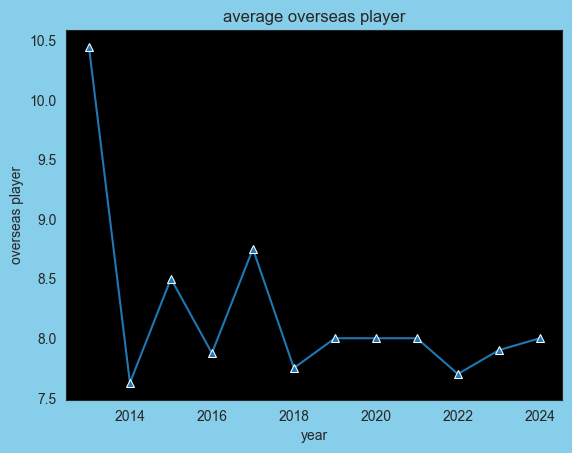

In [246]:
sns.set_style("white",rc={"axes.facecolor": "black"})
plt.gcf().set_facecolor("skyblue") 
sns.lineplot(data=a,x="year",y="overseas_players",marker="^")
plt.title("average overseas player")
plt.xlabel("year")
plt.ylabel("overseas player")
plt.show()

### Which team had the largest squad size (total players) in a season?

In [224]:
(overview.loc[overview.groupby("year")["total_players"].idxmax(),["year","team"]]).style.set_table_styles(
    [{'selector': 'th',
      'props': [('background-color', 'skyblue'), ('color', 'black')]}]
)


,year,team
5,2013,Rising Pune Supergiant
9,2014,Chennai Super Kings
21,2015,Mumbai Indians
25,2016,Delhi Capitals
34,2017,Gujarat Titans
41,2018,Chennai Super Kings
49,2019,Chennai Super Kings
59,2020,Punjab Kings
65,2021,Chennai Super Kings
73,2022,Chennai Super Kings


### How has the overseas players to total players ratio changed over the years?

In [241]:
ratio=(overview.groupby("year")["overseas_players"].sum()/overview.groupby("year")["total_players"].sum())*100

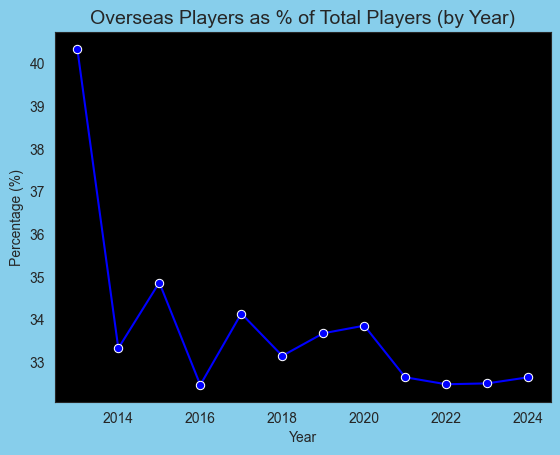

In [244]:
sns.set_style("white", rc={"axes.facecolor": "black"})  
plt.gcf().set_facecolor("skyblue") 

sns.lineplot(x=ratio.index, y=ratio.values, color="blue", marker="o")
plt.title("Overseas Players as % of Total Players (by Year)", fontsize=14,fontweight=20)
plt.xlabel("Year")
plt.ylabel("Percentage (%)")

plt.show()


### Which team had the most funds remaining after the auction in each year?

In [247]:
overview.loc[overview.groupby("year")["funds_remaining"].idxmax(),["year","team"]]

,year,team
6,2013,Rajasthan Royals
14,2014,Rajasthan Royals
22,2015,Rajasthan Royals
27,2016,Punjab Kings
35,2017,Punjab Kings
41,2018,Chennai Super Kings
50,2019,Delhi Capitals
59,2020,Punjab Kings
69,2021,Punjab Kings
79,2022,Punjab Kings


### Which teams tend to spend the most per player on average?

In [168]:
sold_players

,player,type,price_paid,team,year
0,Avanish Rao Aravelly,Wicket Keeper,2000000,Chennai Super Kings,2024
1,Mustafizur Rahman,Bowler,20000000,Chennai Super Kings,2024
2,Daryl Mitchell,All-Rounder,140000000,Chennai Super Kings,2024
3,Sameer Rizvi,Batter,84000000,Chennai Super Kings,2024
4,Rachin Ravindra,All-Rounder,18000000,Chennai Super Kings,2024
...,...,...,...,...,...
1117,Darren Sammy,All-Rounder,425000,Sunrisers Hyderabad,2013
1118,Sudeep Tyagi,Bowler,100000,Sunrisers Hyderabad,2013
1119,Clinton McKay,Bowler,100000,Sunrisers Hyderabad,2013
1120,Nathan McCullum,Bowler,100000,Sunrisers Hyderabad,2013


In [249]:
a=sold_players.groupby(["year","team"])["price_paid"].mean().reset_index().sort_values(["year","price_paid"],
                                                                                     ascending=[True, False]).groupby("year").head(1)
a


,year,team,price_paid
6,2013,Rising Pune Supergiant,6.250000e+05
10,2014,Delhi Capitals,2.608696e+07
18,2015,Delhi Capitals,2.742857e+07
25,2016,Delhi Capitals,2.214286e+07
39,2017,Royal Challengers Bangalore,3.080000e+07
43,2018,Kolkata Knight Riders,3.470588e+07
49,2019,Chennai Super Kings,2.600000e+07
57,2020,Chennai Super Kings,3.612500e+07
71,2021,Royal Challengers Bangalore,4.381250e+07
82,2022,Sunrisers Hyderabad,3.395000e+07


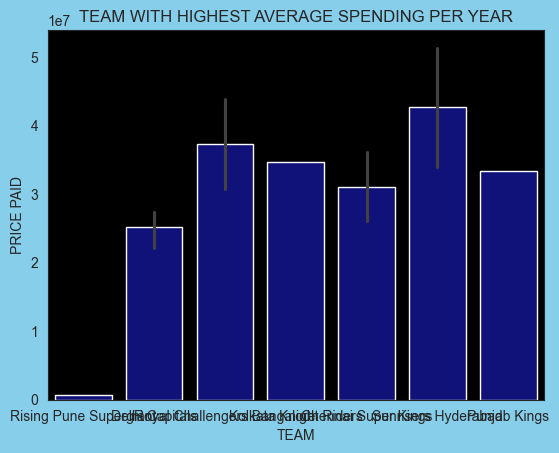

In [263]:
sns.set_style(rc={"axes.facecolor":"black"})
plt.gcf().set_facecolor("skyblue")
sns.barplot(data=a,x="team",y="price_paid",color="darkblue")
plt.title("TEAM WITH HIGHEST AVERAGE SPENDING PER YEAR")
plt.xlabel("TEAM")
plt.ylabel("PRICE PAID")
plt.show()

Which year saw the highest total auction spending overall?

### Who was the most expensive player in each year?

In [272]:
top_buys.loc[top_buys.groupby("year")["price"].idxmax(),["player_name","price","year"]]

,player_name,price,year
95,Glenn Maxwell,53200000,2013
87,Yuvraj Singh,140000000,2014
79,Yuvraj Singh,160000000,2015
71,Shane Watson,95000000,2016
63,Benjamin Stokes,145000000,2017
55,Benjamin Stokes,125000000,2018
47,Jaydev Unadkat,84000000,2019
39,Pat Cummins,155000000,2020
31,Christopher Morris,162500000,2021
20,Ishan Kishan,152500000,2022


### Which player types have the highest average price? 

In [190]:
(
    top_buys.groupby(["year","type"])["price"].mean()
    .reset_index()
    .sort_values(["year","price"], ascending=[True, False])
    .groupby("year").head(1)
)


,year,type,price
0,2013,All-Rounder,3.828000e+07
4,2014,Wicket Keeper,1.250000e+08
8,2015,Wicket Keeper,1.050000e+08
9,2016,All-Rounder,7.360000e+07
11,2017,All-Rounder,9.350000e+07
13,2018,All-Rounder,1.075000e+08
18,2019,Bowler,6.700000e+07
19,2020,All-Rounder,1.043750e+08
22,2021,All-Rounder,1.116667e+08
27,2022,Wicket Keeper,1.300000e+08


### Is there a correlation between number of overseas players and funds remaining?


In [273]:
overview

,team,funds_remaining,overseas_players,total_players,year
0,Chennai Super Kings,98100000,11,22,2013
1,Delhi Capitals,34900000,11,26,2013
2,Punjab Kings,322800000,8,23,2013
3,Kolkata Knight Riders,80200000,11,23,2013
4,Mumbai Indians,18200000,11,28,2013
...,...,...,...,...,...
98,Mumbai Indians,10500000,8,25,2024
99,Punjab Kings,41500000,8,25,2024
100,Rajasthan Royals,2000000,8,22,2024
101,Royal Challengers Bangalore,28500000,8,25,2024


In [277]:
overview["overseas_players"].corr(overview["funds_remaining"])

np.float64(0.2570291130052942)

### How have average squad sizes changed over the years?


In [283]:
c=overview.groupby("year")["total_players"].mean().round().to_frame()
c

,total_players
year,
2013,26.0
2014,23.0
2015,24.0
2016,24.0
2017,26.0
2018,23.0
2019,24.0
2020,24.0
2021,24.0


Text(0, 0.5, 'TOTAL PLAYERS')

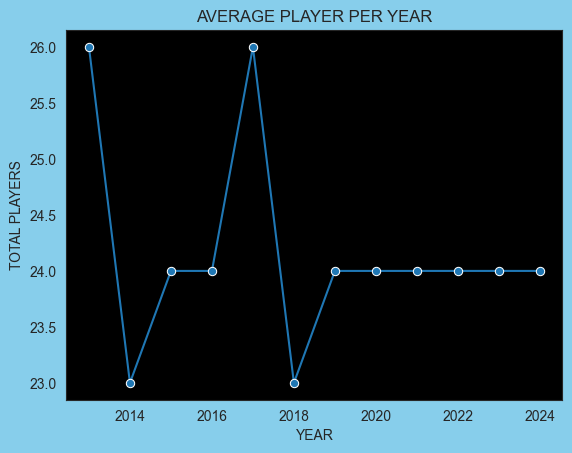

In [288]:
sns.set_style("white",rc={"axes.facecolor":"black"})
plt.gcf().set_facecolor("skyblue")
sns.lineplot(data=c,x="year",y="total_players",marker="o")
plt.title("AVERAGE PLAYER PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("TOTAL PLAYERS")
